In [1]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sns.set()

In [2]:
df = pd.read_csv("./data/Aquifer_Petrignano.csv", index_col=0, parse_dates=True, dayfirst=True)

In [3]:
# Train-Test-Split

train = df[:-365]
test = df[-365:]

In [4]:
train.head(1)

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [6]:
train.isna().sum()

Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  51
Depth_to_Groundwater_P25                  35
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    197
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [7]:
test.isna().sum()

Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                4
Depth_to_Groundwater_P25                4
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   1
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

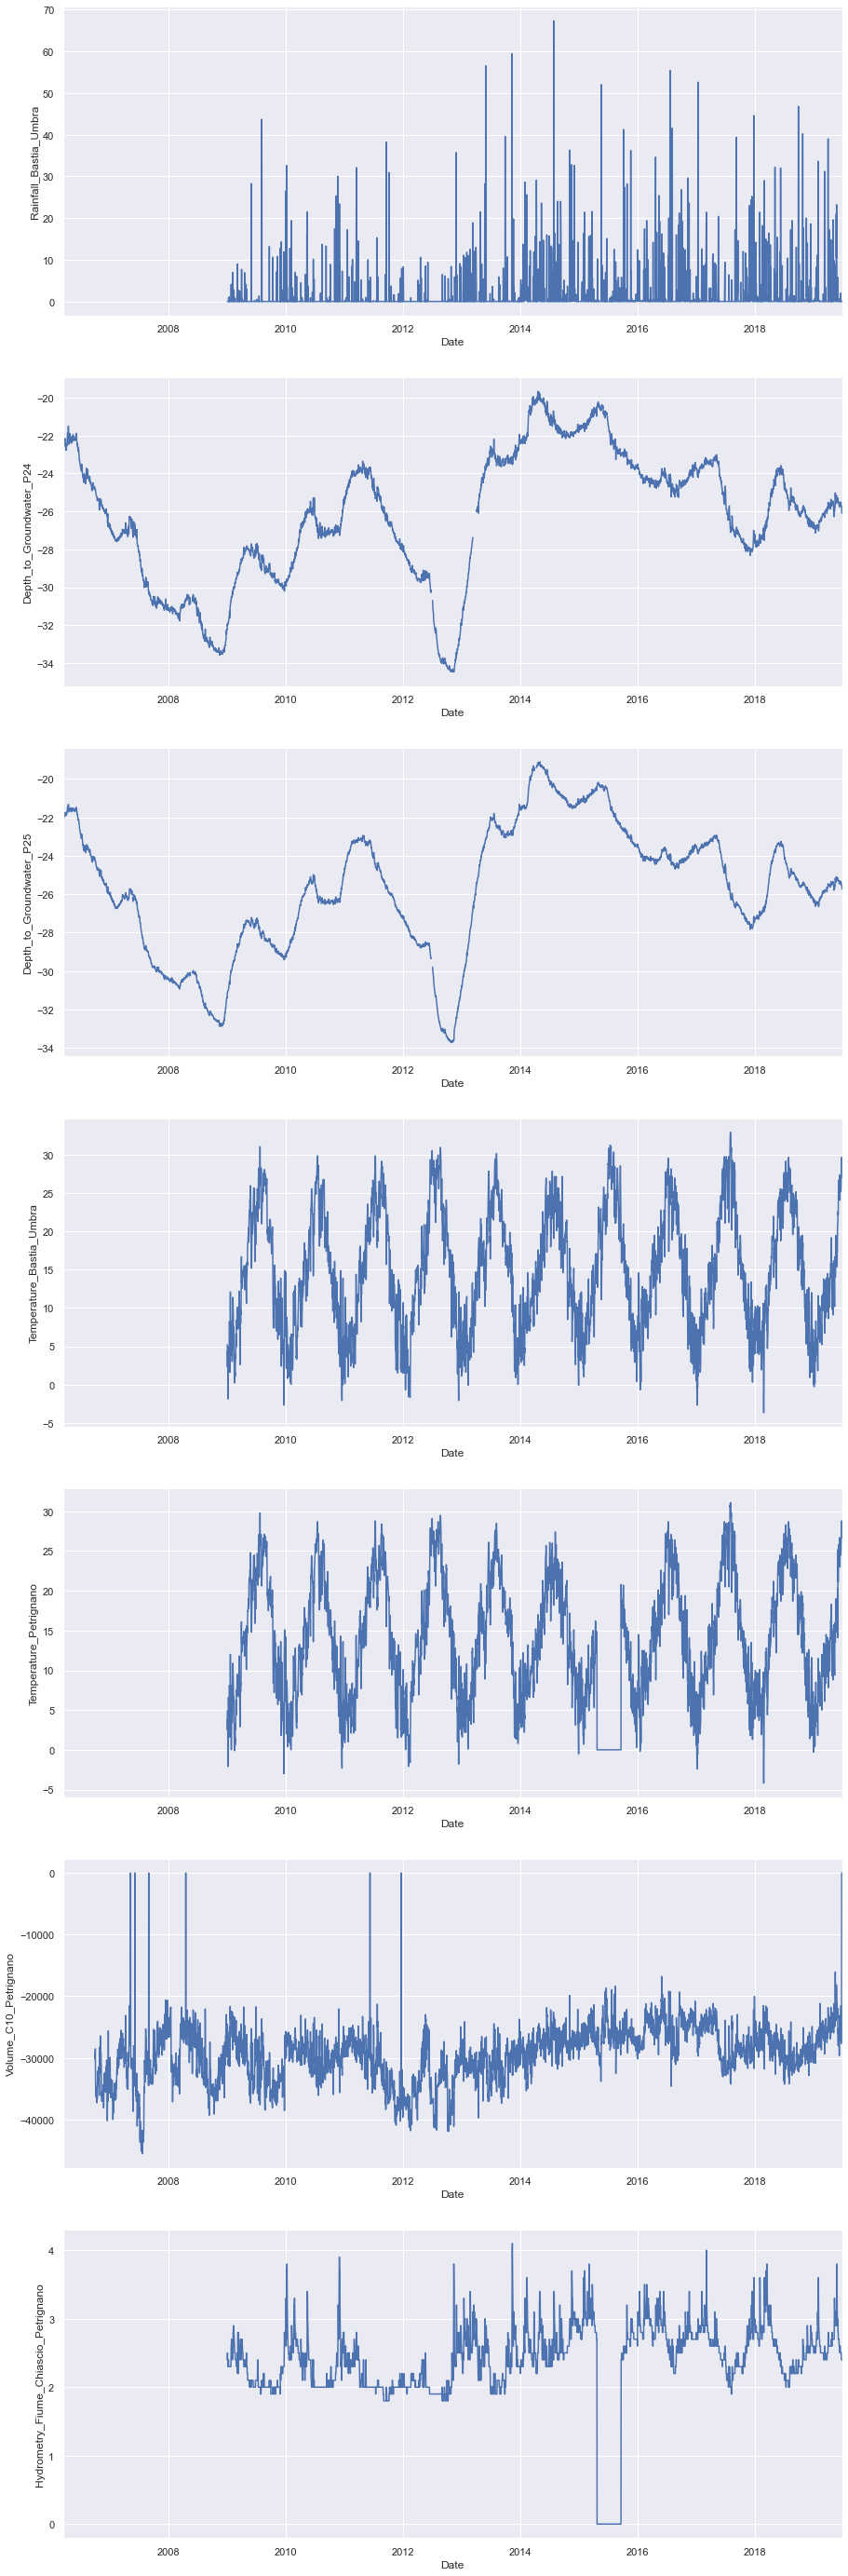

In [10]:
f, ax = plt.subplots(nrows=len(train.columns), ncols=1, figsize=(15, 50))

for element in enumerate(train.columns):
    sns.lineplot(x=train.index, y=train[element[1]], data=train, ax=ax[element[0]])
    ax[element[0]].set_xlim([date(2006, 3, 14), train.index.max()])

plt.show()

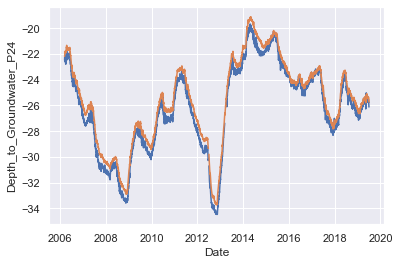

In [9]:
sns.lineplot(x=train.index, y=train['Depth_to_Groundwater_P24'])
sns.lineplot(x=train.index, y=train['Depth_to_Groundwater_P25'])

In [39]:
gw_diff_avg = round((train['Depth_to_Groundwater_P25'] - train['Depth_to_Groundwater_P24']).mean(),2)
gw_diff_std = round((train['Depth_to_Groundwater_P25'] - train['Depth_to_Groundwater_P24']).std(),2)
gw_depth_avg = train[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].mean().mean()
print(f'Avarage Difference in Groundwater Depth between P25 and P24 is: {gw_diff_avg} ± {gw_diff_std} m')
print(f'Avarage Difference in Groundwater Depth between P25 and P24 is: {gw_diff_avg/gw_depth_avg*100:.2f} ± {gw_diff_std/gw_depth_avg*100:.2f} %')

Avarage Difference in Groundwater Depth between P25 and P24 is: 0.6 ± 0.25 m
Avarage Difference in Groundwater Depth between P25 and P24 is: -2.31 ± -0.96 %
